# Anscombe's Quartet — Analysis & Visualisation

## What is Anscombe's Quartet?

Anscombe's Quartet (Anscombe, 1973) is a classic dataset consisting of four groups (I–IV), each containing 11 (x, y) pairs.  
The four groups are famous for sharing **nearly identical descriptive statistics** (mean, variance, correlation, regression line) while looking **completely different** when plotted.  
It was created to demonstrate why visualising data is essential and why summary statistics alone can be misleading.

---

## Log of steps
1. Load the dataset from `anscombe_quartet.tsv`
2. Inspect the data (shape, head)
3. Compute descriptive statistics per group
4. Visualise with a coloured scatter plot
5. Observations & conclusions

## Step 1 — Import libraries

We use:
- **pandas** for data loading and statistics
- **matplotlib** for plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Step 2 — Load the dataset

`pd.read_csv` with `sep='\t'` reads a tab-separated file into a DataFrame.  
We then confirm the shape and preview the first few rows.

In [2]:
df = pd.read_csv('anscombe_quartet.tsv', sep='\t')

print(f'Shape: {df.shape[0]} rows × {df.shape[1]} columns')
print(f'Groups: {sorted(df["dataset"].unique())}')
df.head(12)

Shape: 44 rows × 3 columns
Groups: ['I', 'II', 'III', 'IV']


,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.82


## Step 3 — Descriptive statistics per group

We use `groupby('dataset')` to split the data by group and then call `.describe()` to get count, mean, std, min, quartiles, and max for both `x` and `y` columns.  

The output is transposed and formatted to 4 decimal places for readability.  
Notice how similar the statistics are across groups — this is the whole point of Anscombe's Quartet!

In [3]:
stats = df.groupby('dataset')[['x', 'y']].describe().round(4)

# Display each group's stats in a clean table
for group, group_stats in df.groupby('dataset'):
    print(f'\n=== Group {group} ===')
    print(group_stats[['x', 'y']].describe().round(4).to_string())


=== Group I ===
             x        y
count  11.0000  11.0000
mean    9.0000   7.5009
std     3.3166   2.0316
min     4.0000   4.2600
25%     6.5000   6.3150
50%     9.0000   7.5800
75%    11.5000   8.5700
max    14.0000  10.8400

=== Group II ===
             x        y
count  11.0000  11.0000
mean    9.0000   7.5009
std     3.3166   2.0317
min     4.0000   3.1000
25%     6.5000   6.6950
50%     9.0000   8.1400
75%    11.5000   8.9500
max    14.0000   9.2600

=== Group III ===
             x        y
count  11.0000  11.0000
mean    9.0000   7.5000
std     3.3166   2.0304
min     4.0000   5.3900
25%     6.5000   6.2500
50%     9.0000   7.1100
75%    11.5000   7.9800
max    14.0000  12.7400

=== Group IV ===
             x        y
count  11.0000  11.0000
mean    9.0000   7.5009
std     3.3166   2.0306
min     8.0000   5.2500
25%     8.0000   6.1700
50%     8.0000   7.0400
75%     8.0000   8.1900
max    19.0000  12.5000


### Side-by-side summary (means and std devs)

This cell pulls out just the mean and standard deviation for a compact cross-group comparison, making the near-identical statistics obvious at a glance.

In [4]:
summary = df.groupby('dataset')[['x', 'y']].agg(['mean', 'std']).round(4)
summary.columns = ['x_mean', 'x_std', 'y_mean', 'y_std']
print('Cross-group summary — means and standard deviations:')
print(summary.to_string())

Cross-group summary — means and standard deviations:
         x_mean   x_std  y_mean   y_std
dataset                                
I           9.0  3.3166  7.5009  2.0316
II          9.0  3.3166  7.5009  2.0317
III         9.0  3.3166  7.5000  2.0304
IV          9.0  3.3166  7.5009  2.0306


## Step 4 — Scatter plot (coloured by group)

We create a **2×2 grid of subplots**, one per group, so the structural differences are clearly visible.  

Each group is assigned a distinct colour.  
- A dashed regression line is fitted via `numpy.polyfit` (degree 1) and overlaid on each subplot to show how similar the linear fits are despite the different shapes.
- Axis labels, titles, and a shared legend are added for clarity.

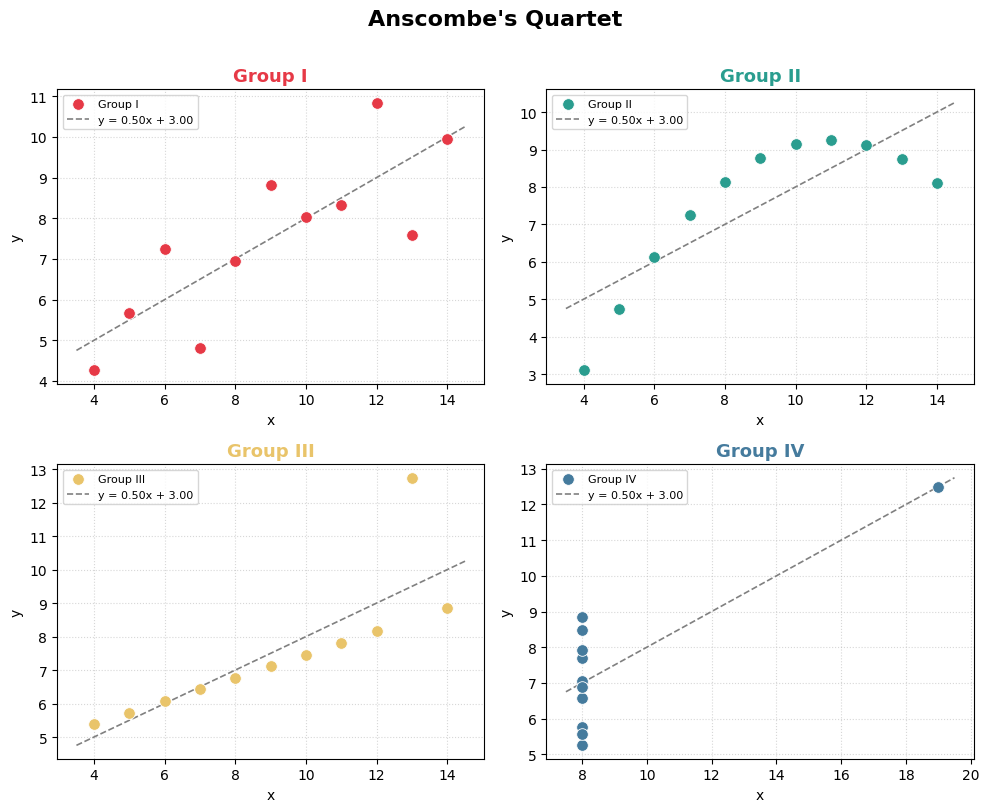

Plot saved as anscombe_scatter.png


In [5]:
import numpy as np

COLORS = {'I': '#E63946', 'II': '#2A9D8F', 'III': '#E9C46A', 'IV': '#457B9D'}
groups = sorted(df['dataset'].unique())

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Anscombe's Quartet", fontsize=16, fontweight='bold', y=1.01)

for ax, group in zip(axes.flat, groups):
    subset = df[df['dataset'] == group]
    color = COLORS[group]

    # Scatter points
    ax.scatter(subset['x'], subset['y'], color=color, s=70, edgecolors='white',
               linewidths=0.6, zorder=3, label=f'Group {group}')

    # Regression line
    m, b = np.polyfit(subset['x'], subset['y'], 1)
    x_line = np.linspace(subset['x'].min() - 0.5, subset['x'].max() + 0.5, 100)
    ax.plot(x_line, m * x_line + b, color='grey', linestyle='--',
            linewidth=1.2, label=f'y = {m:.2f}x + {b:.2f}')

    ax.set_title(f'Group {group}', fontsize=13, fontweight='bold', color=color)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(fontsize=8, loc='upper left')
    ax.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.savefig('anscombe_scatter.png', dpi=150, bbox_inches='tight')
plt.show()
print('Plot saved as anscombe_scatter.png')

## Step 5 — Observations & conclusions

| Group | Shape | Key observation |
|-------|-------|-----------------|
| **I** | Linear | Well-behaved linear relationship with moderate scatter |
| **II** | Curved | Clear quadratic curve — a linear model is the wrong fit |
| **III** | Outlier | Near-perfect line except for one extreme outlier that skews the fit |
| **IV** | Leverage | All x values are identical (x=8) except one high-leverage point (x=19) that drives the regression |

### Key takeaway
> **Summary statistics lie.** All four groups share almost identical means, standard deviations, and regression coefficients, yet their underlying patterns are completely different.  
> Always plot your data before drawing conclusions.